In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures

In [35]:
credit = pd.read_csv('/Users/joyce/Desktop/aaa/Credit.csv')
#credit.info()
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


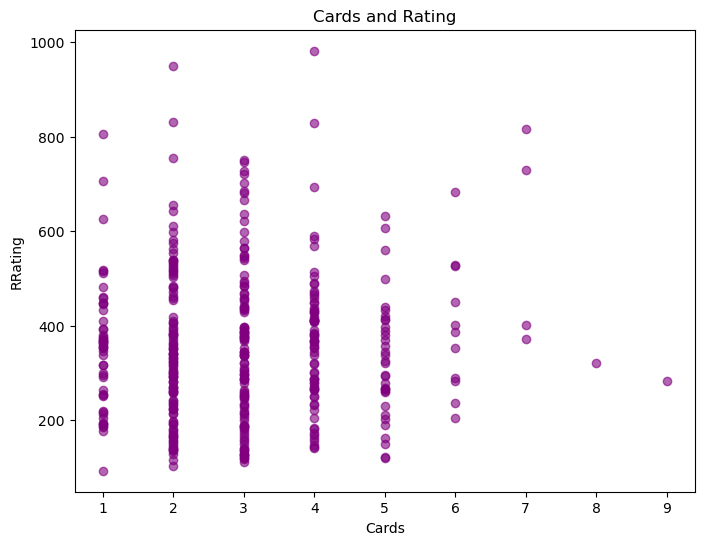

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(credit['Cards'], credit['Rating'], alpha=0.6, color='purple')
plt.title('Cards and Rating')
plt.xlabel('Cards')
plt.ylabel('Rating')
plt.show()

In [37]:
credit['Own'] = credit.Own.map({'No':0, 'Yes':1 })
credit['Student'] = credit.Student.map({'No':0, 'Yes':1 })
credit['Married'] = credit.Married.map({'No':0, 'Yes':1 })
credit['Region'] = credit.Region.map({'East':0, 'West':1 , 'South':2, 'North':3})

credit.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,0,0,1,2,333
1,106.025,6645,483,3,82,15,1,1,1,1,903
2,104.593,7075,514,4,71,11,0,0,0,1,580
3,148.924,9504,681,3,36,11,1,0,0,1,964
4,55.882,4897,357,2,68,16,0,0,1,2,331


In [39]:
credit.describe()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,0.517500,0.100000,0.61250,1.25000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,0.500319,0.300376,0.48779,0.82717,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000,0.00000,0.00000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,0.000000,0.000000,0.00000,1.00000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,1.000000,0.000000,1.00000,1.00000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,1.000000,0.000000,1.00000,2.00000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1.000000,1.000000,1.00000,2.00000,1999.000000


1.Income
收入範圍很大，最低只有 10.35 千美元，最高卻達到 186.63 千美元，平均是 45.22 千美元，說明有些人收入特別高，拉高了整體平均。

2.Limit
信用額度的差距也很明顯，從最低的 855 美元到最高的 13,913 美元，標準差 2,308 美元，這代表用戶之間的信用額度分佈非常不均勻。

3.Student
樣本中只有 10% 的人是學生，比例很低，說明這份資料以非學生為主。

4.Education
教育背景差距很大，從 5 年到 20 年，平均大約是 13.45 年，顯示有人教育程度很低，但也有人受過完整高等教育。

5.Balance
信用卡餘額的分佈偏右，大多數人都低於平均值 520 美元，但有少數人餘額特別高，最高達 1,999 美元。

In [40]:
mul_regr = smf.ols('Limit ~ Income + Age', credit ).fit()
mul_regr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     336.4
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           3.51e-86
Time:                        03:41:25   Log-Likelihood:                -3466.5
No. Observations:                 400   AIC:                             6939.
Df Residuals:                     397   BIC:                             6951.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2661.5157    243.880     10.913      0.000    2182.058    3140.973
Income        52.3252      2.034     25.727      0.000      48.327      56.324
Age           -5.2455      4.156     -1.262      0.208     -13.415       2.924
==============================================================================
Omnibus:                      124.636   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.130
Skew:                          -0.062   Prob(JB):                     4.25e-05
Kurtosis:                       1.908   Cond. No.                         267.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""